In [2]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import  img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline
import math 
import itertools, re, os, random, keras
import plotly.express as px
import datetime
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import time

In [2]:
train_path ='C:\\Users\\Dell\\Birds - Copy\\train'
valid_path ='C:\\Users\\Dell\\Birds - Copy\\valid'
test_path ='C:\\Users\\Dell\\Birds - Copy\\test'

In [6]:
import os
import shutil
import random

data_path = 'C:\\Users\\Dell\\Birds - Copy\\train'
train_path = 'C:\\Users\\Dell\\Birds - Copy\\train_split\\train'
val_path = 'C:\\Users\\Dell\\Birds - Copy\\train_split\\val'
test_path = 'C:\\Users\\Dell\\Birds - Copy\\train_split\\test'

# Define the split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Loop through each class folder in the data_path
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    filenames = os.listdir(class_path)
    random.shuffle(filenames)
    
    # Split the filenames into train, validation, and test sets
    num_files = len(filenames)
    train_cutoff = int(num_files * train_ratio)
    val_cutoff = int(num_files * (train_ratio + val_ratio))
    train_filenames = filenames[:train_cutoff]
    val_filenames = filenames[train_cutoff:val_cutoff]
    test_filenames = filenames[val_cutoff:]
    
    # Copy the train files to the train directory
    for filename in train_filenames:
        src_path = os.path.join(class_path, filename)
        dst_path = os.path.join(train_path, class_name, filename)
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        shutil.copy(src_path, dst_path)
        
    # Copy the validation files to the validation directory
    for filename in val_filenames:
        src_path = os.path.join(class_path, filename)
        dst_path = os.path.join(val_path, class_name, filename)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        shutil.copy(src_path, dst_path)
        
    # Copy the test files to the test directory
    for filename in test_filenames:
        src_path = os.path.join(class_path, filename)
        dst_path = os.path.join(test_path, class_name, filename)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)
        shutil.copy(src_path, dst_path)


In [7]:
def ploti(train_path,which):
    directory=os.listdir(train_path)
    train=pd.DataFrame(directory,columns=['folders'])
    counts=[]
    for i in directory:
        path=train_path+'\\'+i
        num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
        counts.append(num_files)
    train['counts']=counts
    fig = px.pie(train, values='counts', names='folders', title='distribution across '+str(which))
    fig.show()

In [8]:
ploti(train_path,'Train')
ploti(val_path,"Validation")
ploti(test_path,"test")

In [9]:
def plotImagesAndLabels(folder):
    c=1
    directory=os.listdir(folder)
    plt.figure(figsize=(28,20))
    for each in directory:
        currentFolder=folder+ "\\" +each
        for i, file in enumerate(os.listdir(currentFolder)[0:4]):
            full_path=currentFolder+"\\"+file
            plt.subplot(3, 8, c)
            img = mpimg.imread(full_path)
            plt.imshow(img)
            plt.title(each)
            c+=1
    plt.subplots_adjust(wspace=0.3, hspace=-0.1)
    plt.show()

Lets see some samples from training data...


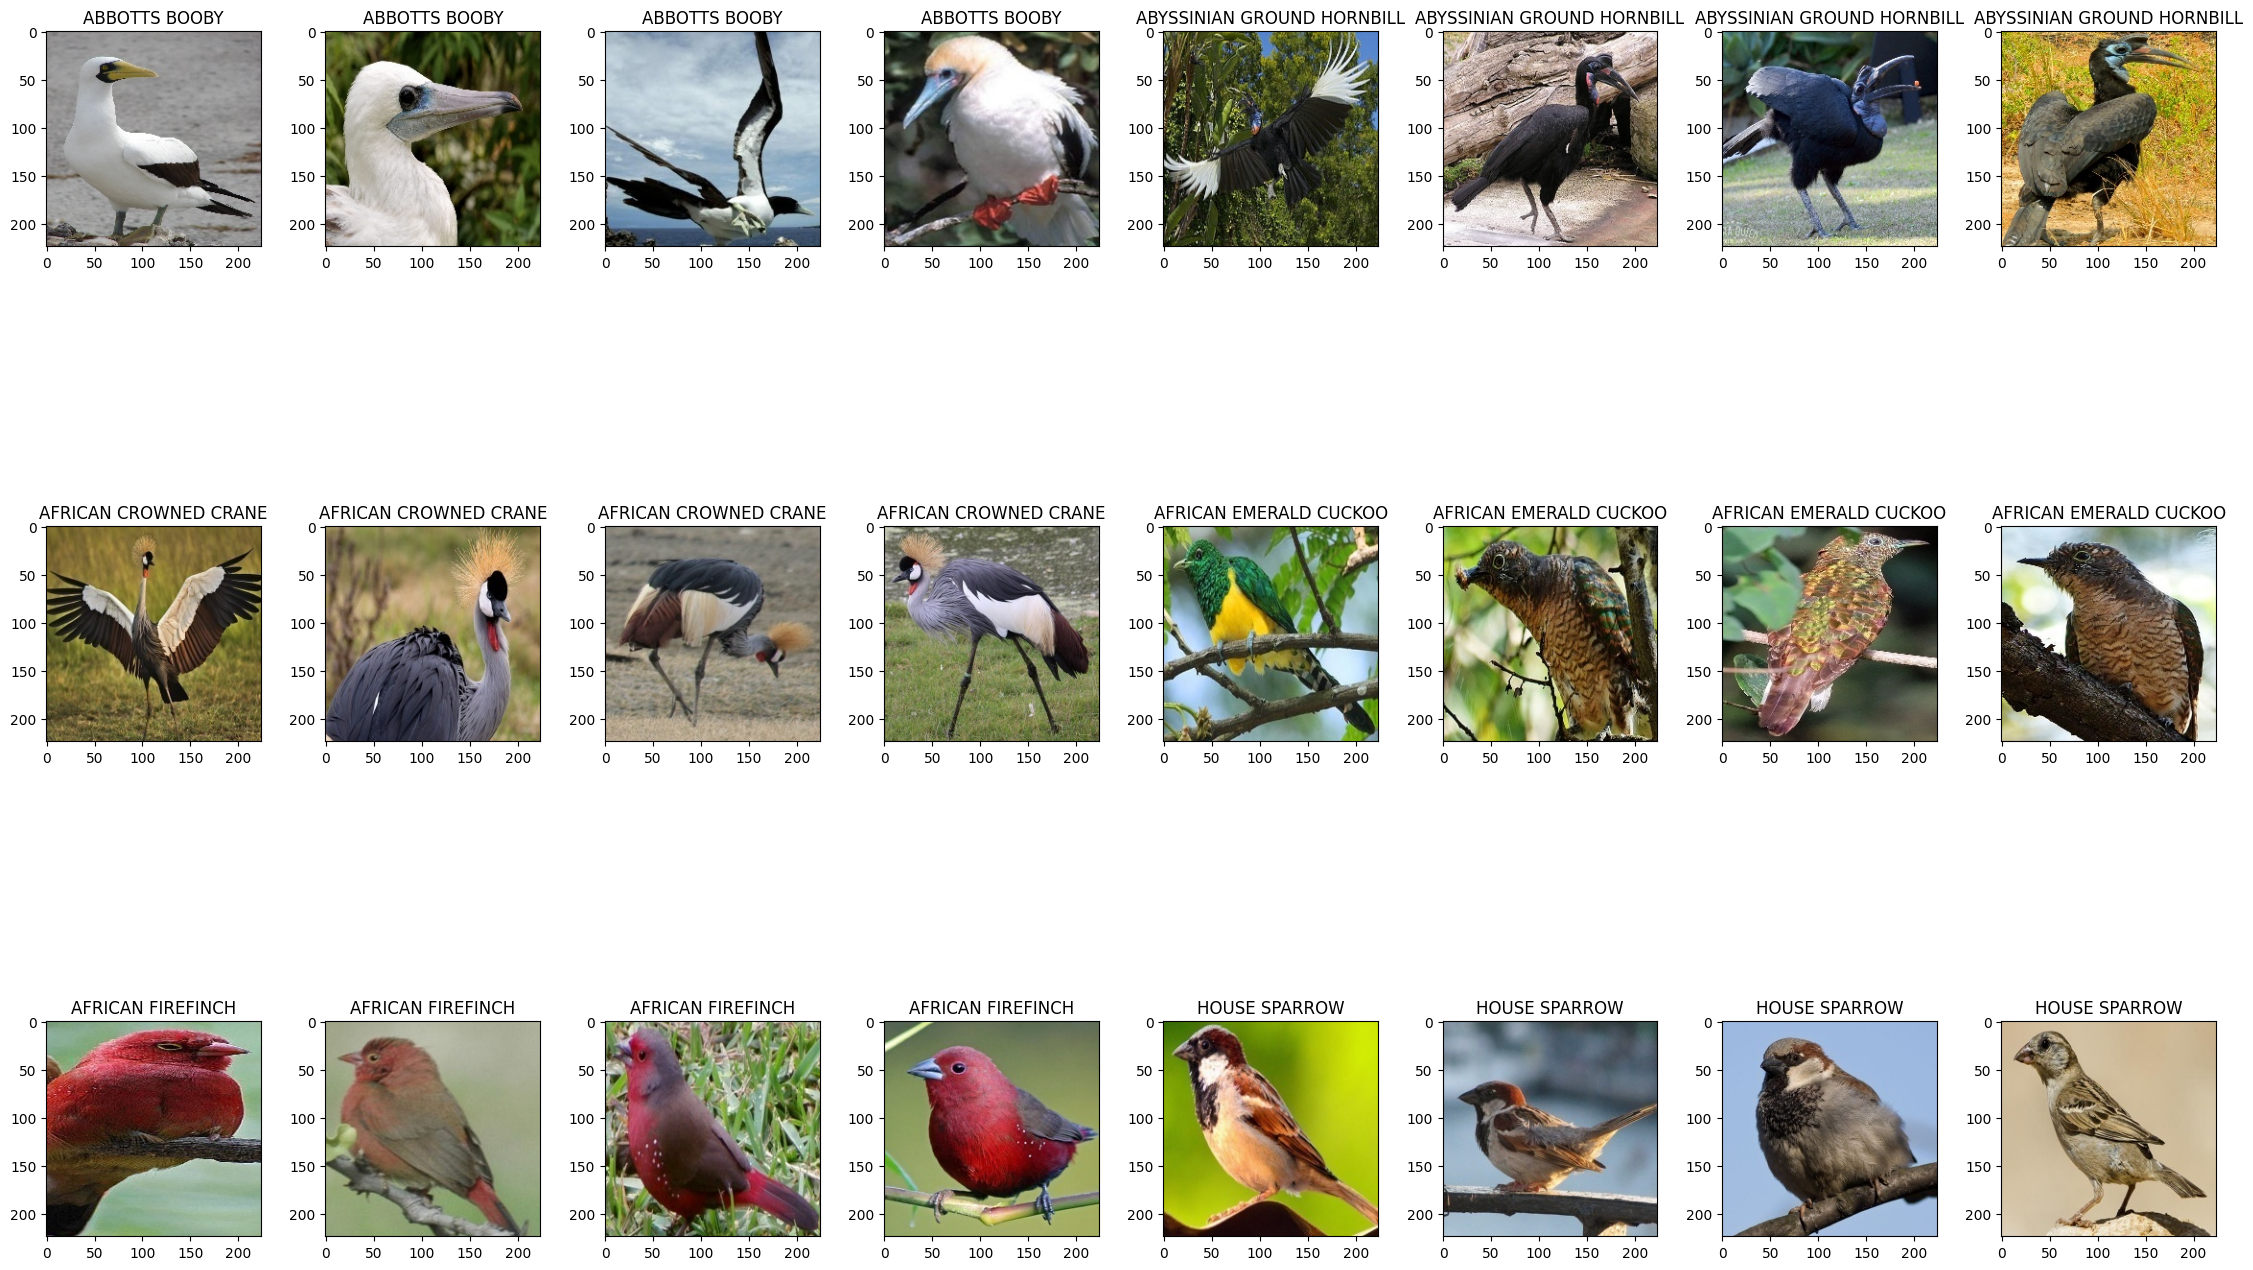

In [10]:
print("Lets see some samples from training data...")
plotImagesAndLabels(train_path)

In [12]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model_ResNet50V2.h5'

# loading up our datasets
train_data_dir = 'C:\\Users\\Dell\\Birds - Copy\\train_split\\train'
validation_data_dir = 'C:\\Users\\Dell\\Birds - Copy\\train_split\\val'
test_data_dir = 'C:\\Users\\Dell\\Birds - Copy\\train_split\\test'
 
# number of epochs to train top model 
epochs = 15 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 30

In [36]:
#Loading ele3b brahtk model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator

InceptionV3_model = InceptionV3(include_top=False, weights='imagenet')
for layer in InceptionV3_model.layers:
    layer.trainable = False

datagen = ImageDataGenerator(rescale=1. / 255)


#needed to create the bottleneck .npy files

In [37]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = ResNet50V2.predict_generator(generator, predict_size_train) 
 
np.save('bottleneck_features_train_ResNet50V2.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 752 images belonging to 6 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\3810984213.py:17: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



Time:  0:00:31.327739


In [38]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
   validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_valid = ResNet50V2.predict_generator(generator, predict_size_train) 
 
np.save('bottleneck_features_valid_ResNet50V2.npy', bottleneck_features_valid)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 94 images belonging to 6 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\1740094929.py:15: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



Time:  0:00:03.867200


In [39]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
   test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_test = ResNet50V2.predict_generator(generator, predict_size_train) 
 
np.save('bottleneck_features_test_ResNet50V2.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 96 images belonging to 6 classes.


C:\Users\Dell\AppData\Local\Temp\ipykernel_3540\1390504043.py:15: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



Time:  0:00:04.092697


In [40]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load('bottleneck_features_train_ResNet50V2.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors P
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 752 images belonging to 6 classes.


In [41]:
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
valid_data = np.load('bottleneck_features_valid_ResNet50V2.npy') 
 
# get the class labels for the training data, in the original order 
valid_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
valid_labels = to_categorical(valid_labels, num_classes=num_classes)

Found 94 images belonging to 6 classes.


In [42]:
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('bottleneck_features_test_ResNet50V2.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 96 images belonging to 6 classes.


In [43]:
from tensorflow.keras import optimizers
from tensorflow.keras import layers
#This is the best model we found.
start = datetime.datetime.now()
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(224,
                                  224,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(200, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.75)) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('resnet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=10)

history = model.fit(train_data, train_labels, 
   epochs=100,
   batch_size=batch_size, 
   validation_data=(valid_data, valid_labels),
                    callbacks=[es,mc])
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    valid_data, valid_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
26/26 [==============================] - ETA: 0s - loss: 3.4204 - acc: 0.4162
Epoch 1: val_loss improved from inf to 0.14090, saving model to resnet.h5
26/26 [==============================] - 7s 241ms/step - loss: 3.4204 - acc: 0.4162 - val_loss: 0.1409 - val_acc: 0.9468
Epoch 2/100
26/26 [==============================] - ETA: 0s - loss: 2.2594 - acc: 0.6130
Epoch 2: val_loss improved from 0.14090 to 0.10772, saving model to resnet.h5
26/26 [==============================] - 6s 236ms/step - loss: 2.2594 - acc: 0.6130 - val_loss: 0.1077 - val_acc: 0.9681
Epoch 3/100
26/26 [==============================] - ETA: 0s - loss: 1.8049 - acc: 0.6769
Epoch 3: val_loss did not improve from 0.10772
26/26 [==============================] - 6s 222ms/step - loss: 1.8049 - acc: 0.6769 - val_loss: 0.1142 - val_acc: 0.9681
Epoch 4/100
26/26 [==============================] - ETA: 0s - loss: 1.5958 - acc: 0.7154
Epoch 4: val_loss improved from 0.10772 to 0.05138, saving model to resnet.h5


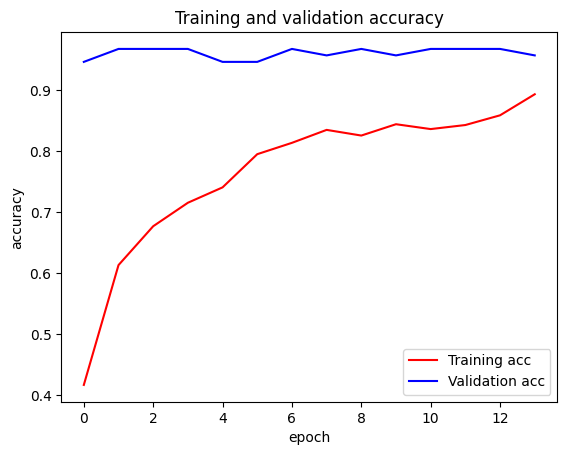

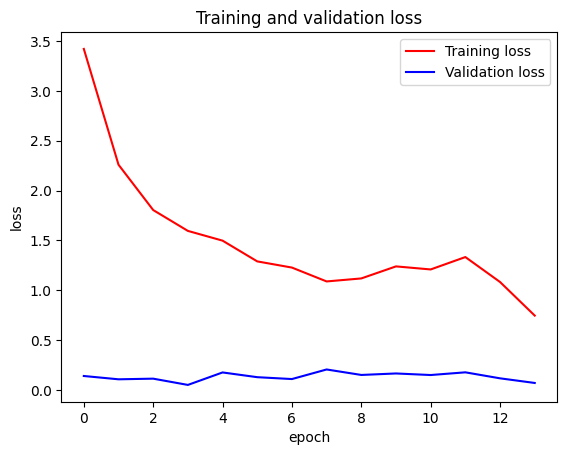

In [44]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [45]:
model.evaluate(test_data,test_labels)

3/3 [==============================] - 0s 19ms/step - loss: 0.1375 - acc: 0.9688


[0.1374800205230713, 0.96875]

In [46]:
preds=np.round(model.predict(test_data),0)
print('rounded test_labels',preds)

3/3 [==============================] - 0s 19ms/step
rounded test_labels [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0.

In [ ]:
implants=['ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO','AFRICAN FIREFINCH','HOUSE SPARROW']
classification_metrics=metrics.classification_report(test_labels,preds,target_names=implants)
print(classification_metrics)

In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

In [ ]:
cm_plot_labels=['ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO','AFRICAN FIREFINCH','HOUSE SPARROW']
plot_confusion_matrix(confusion_matrix,cm_plot_labels,normalize=True)

In [ ]:
model.summary()

In [ ]:
ResNet50V2.summary()

In [ ]:
import cv2

skinimg_path = "C:\\Users\\Andrew\\Dental implants datasets\\test new\\bego 3.7 11.5\\imgsameh-X-20211111-095048-XTMUG4DRPUWE-3.JPG.png"

img = keras.preprocessing.image.load_img(
    skinimg_path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)